# A practical introduction to machine learning and natural language processing on papyrus data 
## By MSc. André Walsøe and dr. Andrea Gasparino University of Oslo


![alt text](https://www.kdnuggets.com/wp-content/uploads/text-data-task-framework.png "Logo Title Text 1")
source: https://www.kdnuggets.com/2017/12/general-approach-preprocessing-text-data.html


# Session 1 Preparation and exploration of Dataset

1. Download dataset from github repository
2. Explore dataset
3. Application of filtering techniques
4. Ways of cleaning the data
5. Show how to use various python libraries such as pandas for working with the data
6. Hands on excercise

### 1.1 Download dataset
The dataset was created by downloading and filtering data from https://github.com/papyri/idp.data/tree/master/APIS

In [10]:
!curl -L -o data.tsv https://raw.githubusercontent.com/auwalsoe/encode_nlp_workshop_2023/main/data/papyrus_data.tsv
#!pip install gradio

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 8467k  100 8467k    0     0  16.4M      0 --:--:-- --:--:-- --:--:-- 16.4M


### 1.2 Data exploration
To load the dataset into our google colab we use a library called pandas (https://pandas.pydata.org) which is a open source data analysis and data manipulation tool that is widely used for every tasks involving data.

In [11]:
#Importing the pandas Library
import pandas as pd

# Loading the downloaded data into a pandas dataframe
#data = pd.read_csv('/content/data.tsv', delimiter = '\t')
data = pd.read_csv('data.tsv', delimiter = '\t')
data.head()

,Unnamed: 0,translation,category,author,summary,keywords,originDate,provenance,num_words_in_translation
0,0,"kollesis obscures much of the text. 6 lines, o...",documentary text,unknown,unknown,papyri,Between 300 and 130 B.C.,unknown,24
1,3,"21 lines, on recto along the fibers; 2 lines (...",letter : conclusion : to maron,unknown,conclusion of a letter to maron about various ...,papyri,Late 2nd or 3rd century A.D.,unknown,24
2,1,3+ cols. (54+ lines) on recto along the fibers...,account : fragment,unknown,unknown,papyri,Late 2nd century B.C.,unknown,12
3,3,"10 lines, on verso across the fibers. on recto...",tax receipt,diodoros,"diodoros and partners, farmers of the crown ta...",papyri,181/182 or 213/214 A.D.,unknown,67
4,3,"49 lines, on verso across the fibers. recto em...",petition from harmiysis and the crown tenants ...,harmiysis,harmiysis and the crown tenants complain to kr...,papyri,Between 105 and 90 B.C.,unknown,240


In [12]:
## Printing column names
for col in data.columns:
    print(col)

Unnamed: 0
translation
category
author
summary
keywords
originDate
provenance
num_words_in_translation


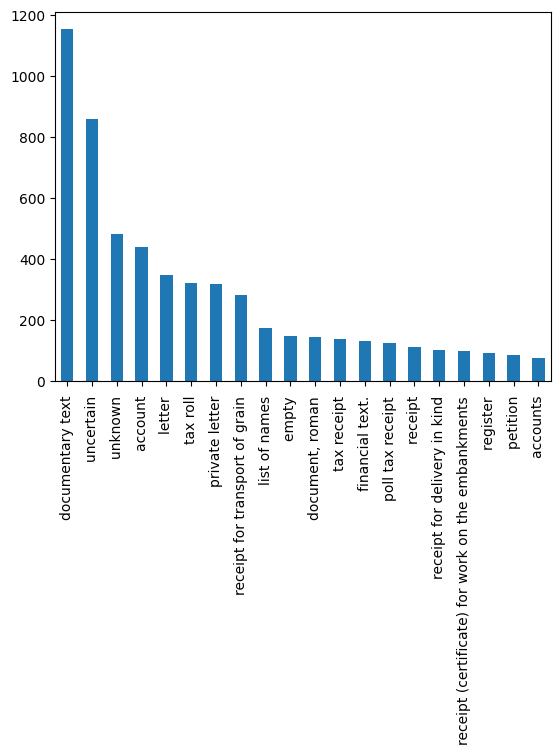

In [20]:
## Get frequencies of columns
def plot_column_distribution(dataset, column_name, top_n):
    dataset[column_name].value_counts()[:top_n].plot(kind="bar")
#data.category.value_counts()[:10].plot(kind='bar')

plot_column_distribution(data, "category", 20)

### 1.3 Application of filtering techniques

In [4]:
# Removing unknowns from the dataset
data = data[data.provenance != 'unknown']
data =data[data.groupby('provenance')['provenance'].transform('count').ge(100)]
translations = data['translation'].values
provenance = data['provenance'].values



In [5]:
translations[:10]

array(['11 lines, on recto along the fibers. verso: account ',
       '19 cols. (315 lines) on recto along the fibers on verso: register of rents and taxes (p.tebt.1106) ',
       '5 lines, on recto along the fibers verso empty � (month) 12-16 in (canal) on behalf of tebtunis, herakl() son of pak() son of kronno(), his mother being heraklous. ',
       '16 lines, on recto along the fibers. on verso: some faint traces of ink. ',
       '9 cols. (127 lines) on recto along the fibers. on verso: decrees of king ptolemy viii euergetes ii : copy ',
       'large portions of papyrus still gummed on top of linen 11+ cols. (160+ lines) on recto along the fibers. on verso of one of smaller fragments remains of a text; remainder of verso empty or covered by linen. ',
       'badly preserved, text being fragmentary and mutilated. 9+ cols. (73+ lines) on verso across the fibers. recto: p.tebt.832 (account of crops and rentals) ',
       'out to conservation 13 dec 04 pjr 3 cols. (78 lines) on recto

### 1.4 Cleaning the data

### 1.5 Show how to use various libraries suchs as pandas for working with the text data

### 1.6 Hands-on excercise: Cleaning and filtering of the dataset

# Session 2: Introduction to nlp techniques
1. Tokenization
2. Stopword removal
3. Vectorization
4. Stemming
5. (Optional) Lemmatization
6. Show how these techniques can be applied on papyrus data using NLTK
7. Hands-on exercise: Apply NLP techniques to papyrus dataset

### 2.1 Tokenization

### 2.2 Stopword removal

### 2.3 Vectorization

### 2.4 Stemming

### 2.5 Lemmatization (optional)

### 2.6 Application of the abovementioned techniques using NLTK

### 2.7 Hands-on exercise: Apply NLP techniques to papyrus dataset

## Session 3: Introduction to machine learning techniques and building a text classification model
1. Introduction to machine learning
2. Supervised learning and unsupervised learning
3. Building a text classification model
    1. Choose what to predict and which variables to use
    2. Split data into training and test
    3. Transform/vectorize data
    4. Train a logistic regression model
    5. Test and evaluate metrics
    6. Deploy model with Gradio
4. Hands-on exercise: Build and train your own classification model 
5. Wrap-up

### 3.1 Introduction to machine learning

### 3.2 Supervised learning and unsupervised learning

### 3.3 Building a text classification model

#### 3.3.1 Choose what to predict and which variables to use

#### 3.3.2 Split data into training and test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(translations, provenance, test_size=0.33, random_state=42)

#### 3.3.3 Transform/vectorize data

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()

X_train= tfidf_vect.fit_transform(X_train)
X_test = tfidf_vect.transform(X_test)

#### 3.3.4 Train a logistic regression model

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

#### 3.3.5 Test and evaluate metrics

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

#### 3.3.6 Deploy model with Gradio                                  

In [ ]:
import gradio as gr

def find_my_provenance(text):
    text_tfidf = tfidf_vect.transform([text])
    return str(model.predict(text_tfidf)[0])
demo = gr.Interface(fn = find_my_provenance, inputs=gr.Textbox(lines=3,placeholder="Papyrus translation here"), outputs="text")
demo.launch(share=True)

### 3.4 Hands-on exercise: Build and train your own classification model

### 3.5 Wrap-up